# Tek Değişkenli Aykırı Gözlem Analizi

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds') 
df = diamonds.copy()
df = df.select_dtypes(include = ['float64', 'int64']) 
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df_table = df["table"].copy()
type(df_table)

pandas.core.series.Series

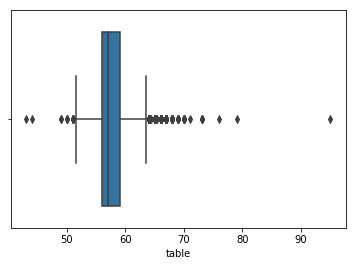

In [6]:
sns.boxplot(x = df_table)

In [7]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1- 1.5*IQR


ust_sinir = Q3 + 1.5*IQR


In [8]:
alt_sinir

51.5

In [9]:
ust_sinir

63.5

In [10]:
#vektör düzeyinde aykırı değer sorgulaması
(df_table < (alt_sinir)) | (df_table > (ust_sinir)) 

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [11]:
df_table < (alt_sinir)

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [12]:
aykiri_tf = df_table < (alt_sinir) # tf:true-false

In [13]:
aykiri_tf[0:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: table, dtype: bool

In [14]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [15]:
aykirilar = df_table[aykiri_tf]
aykirilar.index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

# Aykırı Değer Probleminin Çözülmesi

In [16]:
import pandas as pd

In [17]:
df_table=pd.DataFrame(df_table)
df_table.head()

,table
0,55.0
1,61.0
2,65.0
3,58.0
4,58.0


In [18]:
type(df_table)

pandas.core.frame.DataFrame

In [19]:
df_table.shape

(53940, 1)

### Aykırı değerleri silmek

In [20]:
# "~"(tilda) dışında kalanlar, "|"(ya da) anlamına gelir.
temiz_df_table = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 1)]

In [21]:
temiz_df_table.shape

(53335, 1)

#### Aykırı değerleri ortalama ile doldurmak

In [22]:
df_table = df["table"].copy()

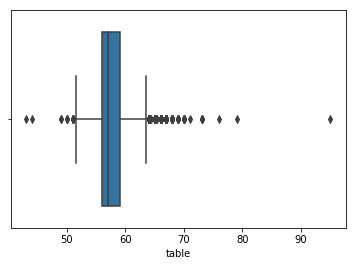

In [23]:
sns.boxplot(x = df_table)

In [24]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [25]:
df_table.mean()

57.45718390804603

In [26]:
df_table[aykiri_tf] = df_table.mean()

In [27]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

In [28]:
aykiri_tf = (df_table < (alt_sinir)) | (df_table > (ust_sinir))

In [29]:
df_table[aykiri_tf].head()

2      65.0
91     69.0
145    64.0
219    64.0
227    67.0
Name: table, dtype: float64

In [30]:
df_table.describe()

count    53940.000000
mean        57.459505
std          2.230030
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [31]:
df_table[aykiri_tf] = df_table.mean()

In [32]:
df_table.describe()

count    53940.000000
mean        57.374369
std          2.062703
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

### Aykırı değerleri baskılama yöntemi ile doldurmak

In [33]:
#Baskılama:Alt sınır ve üst sınırları bazı aykırı değerler için kabul etmek bunlarla birlikte baskılamaktır.
df_table = df["table"].copy()

In [34]:
aykiri_tf_alt = df_table < (alt_sinir)
aykiri_tf_ust = df_table < (ust_sinir)

In [35]:
df_table[aykiri_tf_alt]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [36]:
df_table[aykiri_tf_ust]

0        55.0
1        61.0
3        58.0
4        58.0
5        57.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53350, dtype: float64

In [37]:
df_table[aykiri_tf_alt] = alt_sinir 
df_table[aykiri_tf_ust] = ust_sinir 

In [38]:
df_table[aykiri_tf_alt]

1515     63.5
3238     63.5
3979     63.5
4150     63.5
5979     63.5
7418     63.5
8853     63.5
11368    63.5
22701    63.5
25179    63.5
26387    63.5
33586    63.5
35633    63.5
45798    63.5
46040    63.5
47630    63.5
Name: table, dtype: float64

In [39]:
df_table[aykiri_tf_ust]

0        63.5
1        63.5
3        63.5
4        63.5
5        63.5
         ... 
53935    63.5
53936    63.5
53937    63.5
53938    63.5
53939    63.5
Name: table, Length: 53350, dtype: float64

# Çok Değişkenli Aykırı Gözlem Analizi

## Local Outlier Factor

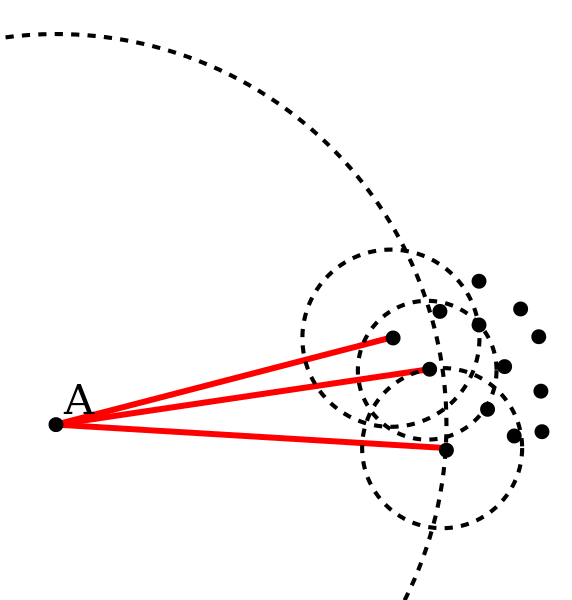

In [40]:
from IPython.display import Image
Image(filename =  "lof_intuition.png" , width=400, height=400)
# Gözlemleri bulundukları konumda yoğunluk tabanlı olarak skorlayan
#ve buna göre aykırı değer olabilecek değerleri tanımlayabilmemizi
#sağlayan bir yöntemdir.

In [41]:
#yapay veri seti oluşturma

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)
X_inliers = np.random.normal(70, 3, (100, 2))

X_inliers = np.r_[X_inliers + 10, X_inliers - 10] 
# r_ ifadesi index problemine takılmadan
#daha hızlı array oluşturmak için kullanılır.

print(X_inliers.shape)
print(X_inliers[:3,:2])

(200, 2)
[[81.49014246 79.5852071 ]
 [81.94306561 84.56908957]
 [79.29753988 79.29758913]]


In [43]:
X_outliers = np.random.uniform(low=15, high=130, size=(20, 2))
#uniform dağılımlı kitleden en düşük değeri 15, en yüksek değeri 130,
# 20 gözlemden oluşacak, 2 değişkenden oluşacak

In [44]:
X_outliers

array([[115.89790327, 100.18839104],
       [ 95.15681021,  95.78566966],
       [ 56.34148239,  48.76306209],
       [108.07653288, 108.16304039],
       [114.71331664, 120.02266354],
       [ 73.80437587,  72.67437389],
       [106.80394558,  89.74585204],
       [ 95.72619088, 106.51615699],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 68.54377209,  77.40413299],
       [ 47.95224399,  82.94582497],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263],
       [ 77.17303899,  88.30443867]])

In [45]:
X = np.r_[X_inliers, X_outliers]

In [46]:
X[0:3,:]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [47]:
# LOF skorlarının hesaplanması

In [48]:
LOF = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1) #n_neighbors=komşuluk sayısı 

In [49]:
LOF.fit_predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [50]:
#bütün gözlemleri bu skorlama işlemine tabi tutalım.

In [51]:
X_score = LOF.negative_outlier_factor_

In [52]:
X_score[0:3]

array([-0.99920793, -1.14732911, -0.97212675])

In [53]:
X_score.mean()

-1.6850227435158005

In [54]:
X_score.std()

2.140119050235338

In [55]:
np.sort(X_score)[0:10]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573,  -8.51275904])

(array([0.06611933, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.06611933, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.06611933, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

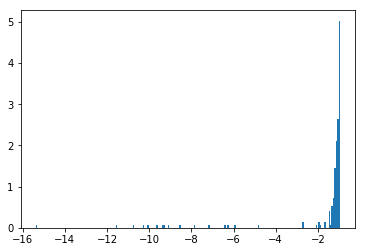

In [56]:
plt.hist(X_score, bins = "auto", density = True)

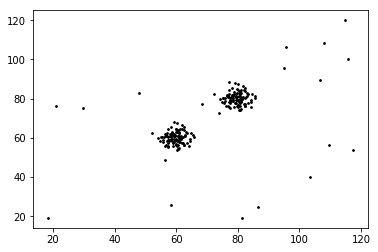

In [57]:
plt.scatter(X[:,0], X[:,1], color = "k", s = 3, label = "Gözlem Birimleri");

In [58]:
radius = radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())

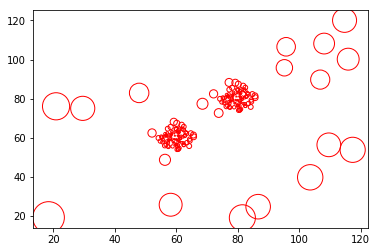

In [59]:
plt.scatter(X[:, 0], X[:, 1], s = 1000 * radius, edgecolors='r', #s:markersize nokta etrafındaki büyüklük
            facecolors='none',label='LOF Skorları')  #facecolors:içi boş

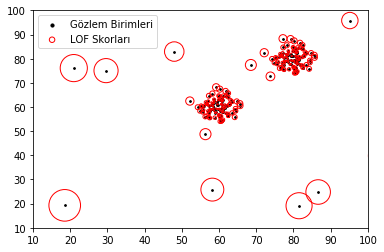

In [60]:
plt.scatter(X[:,0], X[:,1], color = "k", s = 3, label = "Gözlem Birimleri");

plt.scatter(X[:, 0], X[:, 1], s = 1000 * radius, edgecolors='r', 
            facecolors='none',label='LOF Skorları')

plt.xlim((10,100))
plt.ylim((10,100))

legend = plt.legend(loc = "upper left")

legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [30]

In [61]:
#Gerçekte veriler çok değişkenli olduğunda direkt localoutlier factorlerini hesaplayıp
# hiç görseller görmeden işlemler gerçekleştiriyor oluruz.Eğer çok değişkenli veri setinizi
# bu şekilde görselleştirip içindeki aykırı gözlemleri de yakalamak isterseniz veri setinizi önce
# temel bileşen analizi ile iki boyuta indirgeyip bunun üzerine iki eksen için scatterplot yaparsanız
# daha önceden yakalamış olduğunuzu varsaydığımız aykırı gözlem indexlerini bu grafik içine yerleştirirseniz
# bu durumda çok değişkenli veri setinizin aykırı gözlemlerinde boyut indirgemesi yardımıyla aynı grafik üstüne 
# çizdirebilirsiniz.

#### Aykırı Gözlemlerin Yakalanması

In [62]:
X[0:3]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [63]:
np.sort(X_score)[0:9]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573])

In [64]:
esik_deger = np.sort(X_score)[9]
esik_deger

-8.512759037993277

In [65]:
(X_score > esik_deger)[200:220]

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True])

In [66]:
tf_vektor = (X_score > esik_deger)

In [67]:
tf_vektor

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [68]:
X[X_score > esik_deger] #aykırı olmayan gözlemler

array([[ 81.49014246,  79.5852071 ],
       [ 81.94306561,  84.56908957],
       [ 79.29753988,  79.29758913],
       [ 84.73763845,  82.30230419],
       [ 78.59157684,  81.62768013],
       [ 78.60974692,  78.60281074],
       [ 80.72588681,  74.26015927],
       [ 74.8252465 ,  78.31313741],
       [ 76.96150664,  80.942742  ],
       [ 77.27592777,  75.7630889 ],
       [ 84.39694631,  79.3226711 ],
       [ 80.20258461,  75.72575544],
       [ 78.36685183,  80.33276777],
       [ 76.54701927,  81.12709406],
       [ 78.19808393,  79.12491875],
       [ 78.19488016,  85.55683455],
       [ 79.95950833,  76.82686721],
       [ 82.46763474,  76.33746905],
       [ 80.62659079,  74.12098963],
       [ 76.01544185,  80.59058371],
       [ 82.21539974,  80.51410484],
       [ 79.65305515,  79.09668891],
       [ 75.56443403,  77.84046737],
       [ 78.61808369,  83.17136668],
       [ 81.03085487,  74.71087953],
       [ 80.97225191,  78.84475316],
       [ 77.969234  ,  81.83502887],
 

In [69]:
X[X_score < esik_deger] #aykırı gözlemler

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [70]:
X[~tf_vektor] #aykırı gözlemler

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [71]:
X[X_score < esik_deger]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [72]:
X[200:220]

array([[115.89790327, 100.18839104],
       [ 95.15681021,  95.78566966],
       [ 56.34148239,  48.76306209],
       [108.07653288, 108.16304039],
       [114.71331664, 120.02266354],
       [ 73.80437587,  72.67437389],
       [106.80394558,  89.74585204],
       [ 95.72619088, 106.51615699],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 68.54377209,  77.40413299],
       [ 47.95224399,  82.94582497],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263],
       [ 77.17303899,  88.30443867]])

# Aykırı Gözlem Problemini Çözmek

In [73]:
#aykırı gözlemleri silmek

In [74]:
df = X[X_score > esik_deger]

In [75]:
df[0:10]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913],
       [84.73763845, 82.30230419],
       [78.59157684, 81.62768013],
       [78.60974692, 78.60281074],
       [80.72588681, 74.26015927],
       [74.8252465 , 78.31313741],
       [76.96150664, 80.942742  ],
       [77.27592777, 75.7630889 ]])

In [76]:
#aykırı gözlemleri ortalama ile değiştirmek

In [77]:
df_X = X.copy()

In [78]:
np.mean(df_X[0])
np.mean(df_X[1])

83.25607759176307

In [79]:
df_X[~tf_vektor] #bunlar bizim aykırı gözlemlerimiz

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [80]:
aykirilar = df_X[~tf_vektor]

In [81]:
aykirilar[:,:1]

array([[114.71331664],
       [117.35061431],
       [ 58.19203955],
       [ 81.50221621],
       [ 18.50752874],
       [109.59906448],
       [ 29.61195895],
       [103.54925861],
       [ 86.63240472],
       [ 20.94339793]])

In [82]:
aykirilar[:,1:2]

array([[120.02266354],
       [ 53.86944304],
       [ 25.80792308],
       [ 19.13336149],
       [ 19.29504171],
       [ 56.42192376],
       [ 75.05797491],
       [ 39.81941816],
       [ 24.81495847],
       [ 76.10578263]])

In [83]:
aykirilar[:,:1] = np.mean(df_X[0])

In [84]:
aykirilar[:,1:2] = np.mean(df_X[1])

In [85]:
aykirilar

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

In [86]:
df_X[~tf_vektor] = aykirilar

In [87]:
df_X[~tf_vektor]

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

In [88]:
#aykırı gözlemleri baskılama ile değiştirmek

In [89]:
df_X = X.copy()

In [90]:
df_X[~tf_vektor]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [91]:
df_X[X_score == esik_deger]

array([[58.19203955, 25.80792308]])

In [92]:
df_X[~tf_vektor] = df_X[X_score == esik_deger]

In [93]:
df_X[~tf_vektor]

array([[58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308]])

# Eksik Veri - Hızlı Çözüm

In [94]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [95]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [96]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [97]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [98]:
dff = df.dropna()
dff

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [99]:
dff.isnull().sum()

V1    0
V2    0
V3    0
dtype: int64

In [100]:
df["V1"].mean()

6.0

In [101]:
df["V1"].fillna(df["V1"].mean()) #ortalama atanabilir.

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [102]:
df["V1"].fillna(0) #sıfır atanabilir.

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [103]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0) #bütün değişkenlere atamak.

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


## Eksik veriyi saptamak

In [104]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [105]:
df.shape

(9, 3)

In [106]:
df.describe()

,V1,V2,V3
count,7.0,6.000000,7.00000
mean,6.0,6.166667,11.00000
std,5.0,3.656045,9.72968
min,1.0,2.000000,2.00000
25%,2.0,3.500000,5.50000
50%,6.0,6.000000,7.00000
75%,8.0,7.750000,13.00000
max,15.0,12.000000,31.00000


In [107]:
df.dtypes

V1    float64
V2    float64
V3    float64
dtype: object

In [108]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [109]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [110]:
df.isnull().sum().sum()

7

In [111]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [112]:
df[df.isnull().any(axis = 1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [113]:
df[df.notnull().all(axis = 1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [114]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Görselleştirme

In [115]:
!pip install missingno

You are using pip version 9.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [116]:
import missingno as msno

In [117]:
df.head()

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0


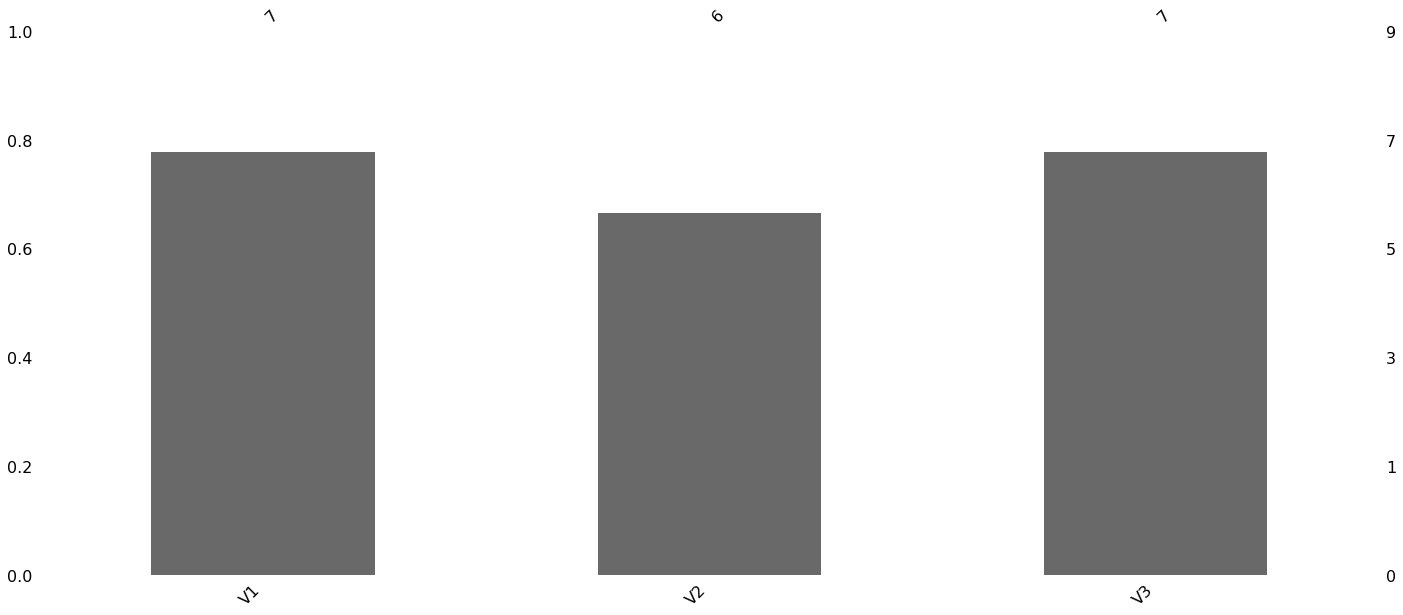

In [118]:
msno.bar(df);

In [119]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [120]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


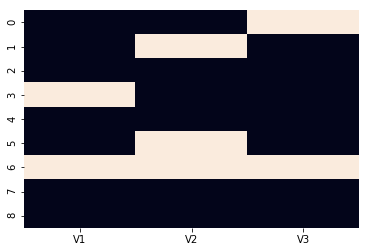

In [121]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar = False);

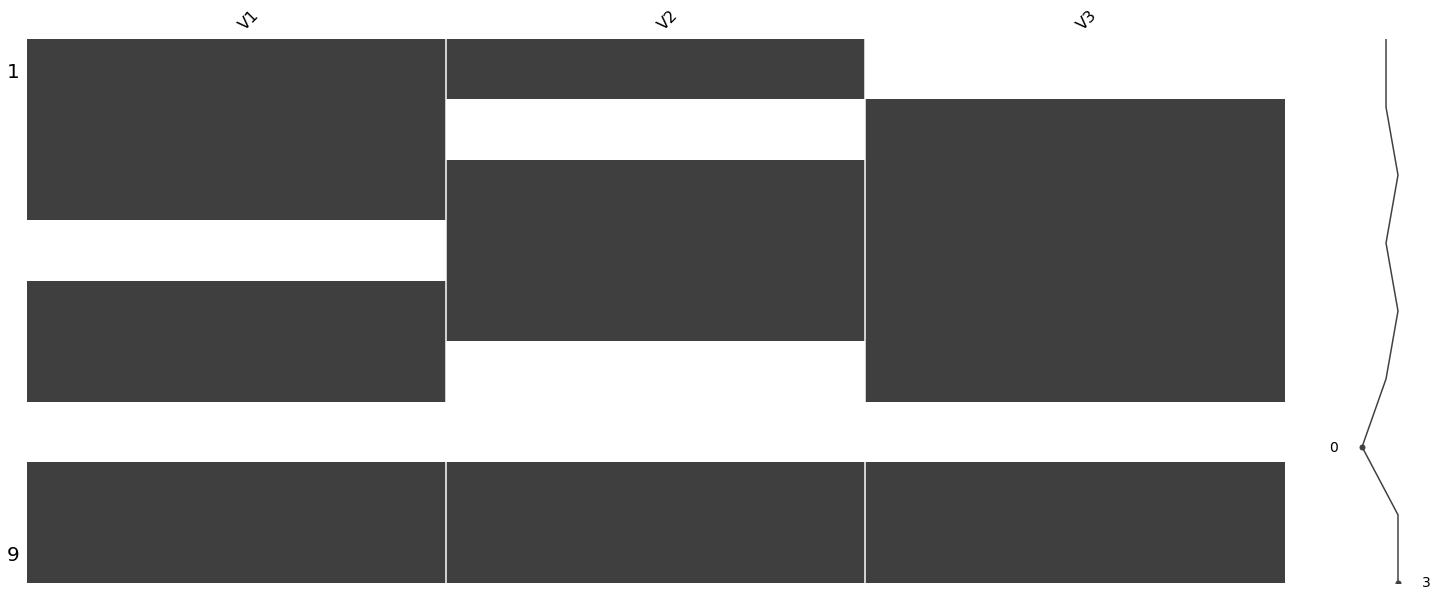

In [122]:
msno.matrix(df)

In [123]:
df = sns.load_dataset("planets").copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


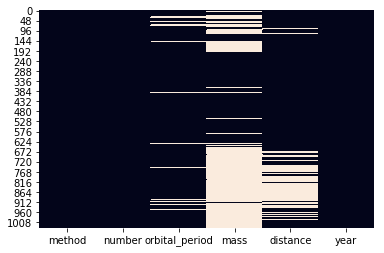

In [124]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar = False);

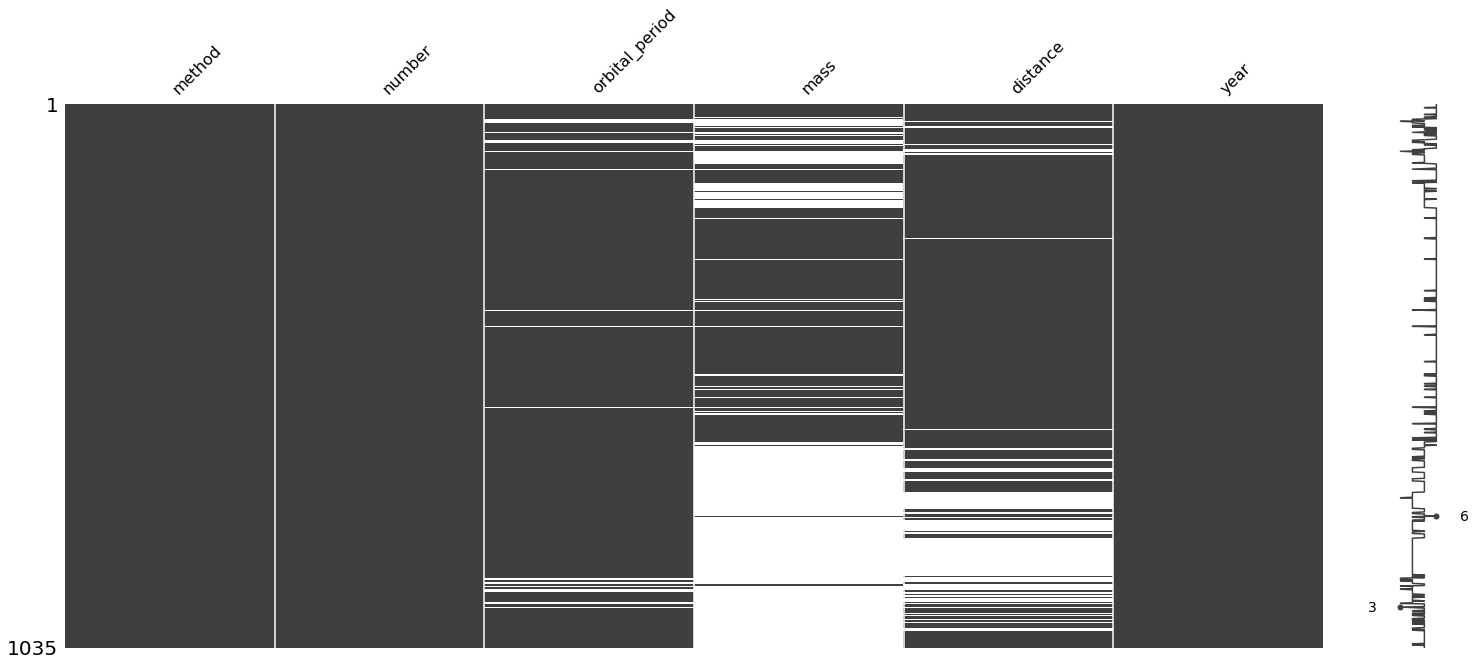

In [125]:
msno.matrix(df);

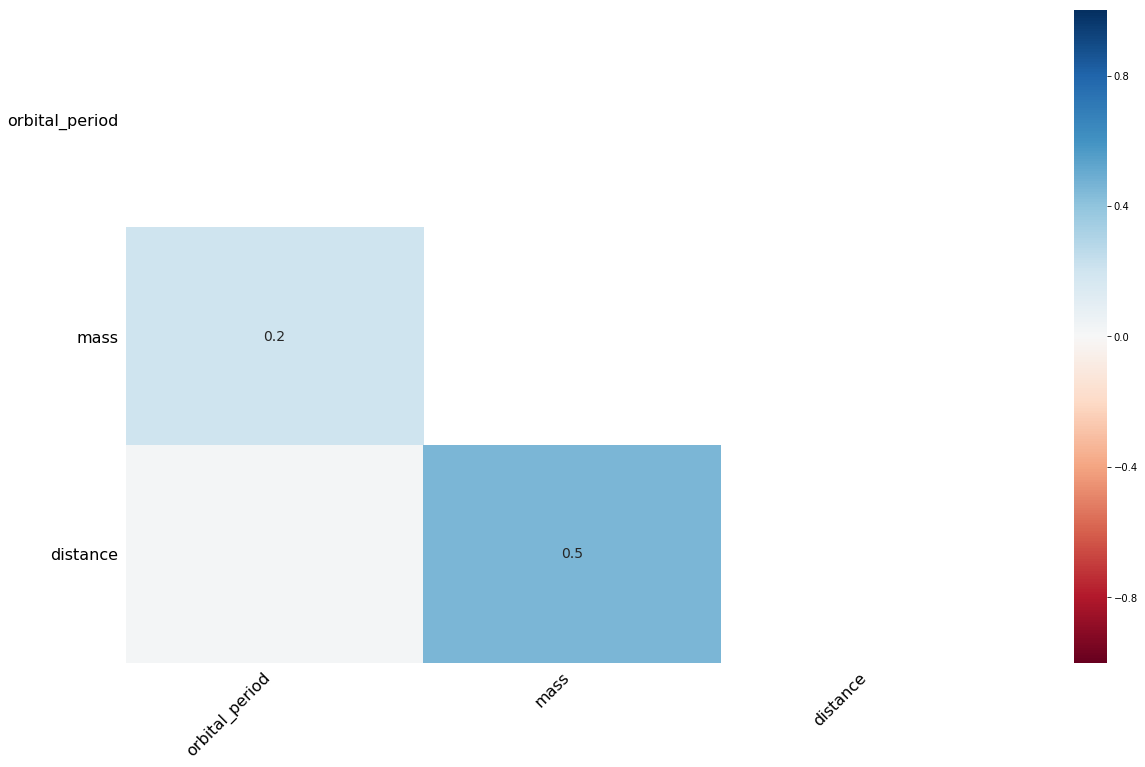

In [126]:
msno.heatmap(df);

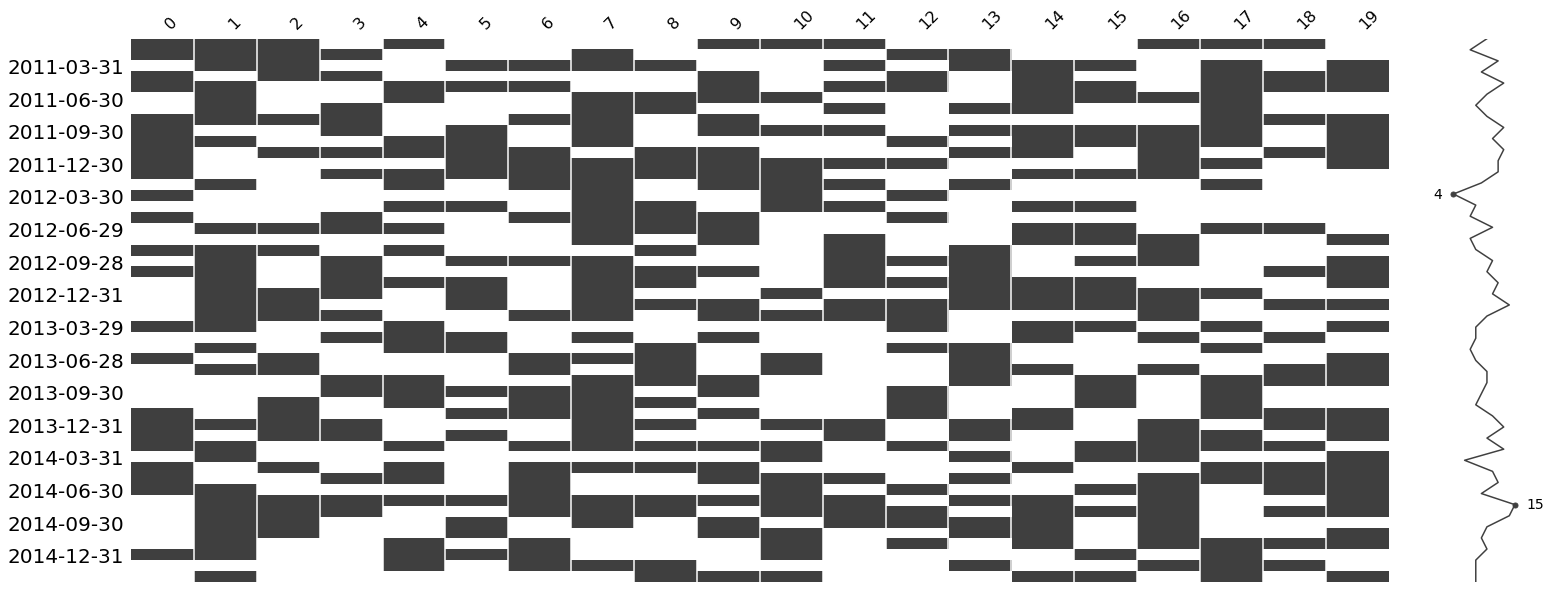

In [127]:
# suni veri seti ile zaman serisi üzerindeki eksiklik
null_pattern = (np.random.random(1000).reshape((50, 20)) > 0.5).astype(bool)

null_pattern = pd.DataFrame(null_pattern).replace({False: None})

msno.matrix(null_pattern.set_index(pd.period_range('1/1/2011', '2/1/2015', freq='M')) , freq='BQ');

## Silme Yöntemleri

In [128]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [129]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [130]:
df.dropna(how = "all") #tüm gözlem değerleri aynı anda na olanları sil

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [131]:
df.dropna(axis = 1) #en az bir tane eksik değere sahip değişkenleri silmek

""
0
1
2
3
4
5
6
7
8


In [132]:
df["V1"][[3,6]] = 99

In [133]:
df.dropna(axis = 1)

,V1
0,1.0
1,3.0
2,6.0
3,99.0
4,7.0
5,1.0
6,99.0
7,9.0
8,15.0


In [134]:
df.dropna(axis = 1, how = "all") #tüm değerleri na olan sütunu silmek

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,99.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,99.0,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [135]:
df["sil_beni"] = np.nan 

In [136]:
df

,V1,V2,V3,sil_beni
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,99.0,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,99.0,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [137]:
df.dropna(axis = 1, how = "all", inplace = True)

In [138]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,99.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,99.0,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Basit Değer Atama Yöntemleri

In [139]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [140]:
df["V1"].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [141]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [142]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0 )

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [143]:
df.fillna(df.mean()[:])

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [144]:
df.fillna(df.mean()["V1":"V2"])
df.fillna(df.median()["V3"])

,V1,V2,V3
0,1.0,7.0,7.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,7.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,7.0,7.0
6,7.0,7.0,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [145]:
df.where(pd.notna(df), df.mean(), axis = "columns") 

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [146]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [147]:
#mesela burada maaslardaki eksik verilere ortalama atamak istersek
#departmanlara göre ortalamalarını atamamız doğru olacaktır.

In [148]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [149]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

## Kategorik Değişkenlerde Değer Atama

In [150]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT",np.NaN,"IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,nan
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [151]:
df.isnull() #nan yazmasına rağmen false yazıyor string olarak algılanmış,bunu düzeltmeliyiz.

,maas,V2,V3,departman
0,False,False,True,False
1,False,True,False,False
2,False,False,False,False
3,True,False,False,False
4,False,False,False,False
5,False,True,False,False
6,True,True,True,False
7,False,False,False,False
8,False,False,False,False


In [152]:
df.groupby("departman")["departman"].count()

departman
IK     5
IT     3
nan    1
Name: departman, dtype: int64

In [153]:
df.departman.loc[df.departman == "nan"] = "IK"

In [154]:
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IK
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [155]:
df.departman[0] = df.V3[0]

In [156]:
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,IK
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [157]:
df.groupby("departman")["departman"].count()

departman
IK    6
IT    2
Name: departman, dtype: int64

In [158]:
df.departman.fillna(df["departman"].mode()) #en sık tekrar eden gözlemi atadık

0    IK
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

## ZamanSerilerinde Atama İşlemleri

In [159]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [160]:
df_i=df["maas"].interpolate().copy()#mesela zaman serilerinde bir önceki değer ile bir sonraki değer ortalaması ataması kullanışlıdır.
df_i

0     1.0
1     3.0
2     6.0
3     6.5
4     7.0
5     1.0
6     5.0
7     9.0
8    15.0
Name: maas, dtype: float64

In [161]:
df_b=df["maas"].fillna(method = "bfill").copy() #bir sonraki değer ataması
df_b

0     1.0
1     3.0
2     6.0
3     7.0
4     7.0
5     1.0
6     9.0
7     9.0
8    15.0
Name: maas, dtype: float64

## Tahmine Dayalı Değer Atama Yöntemleri

number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


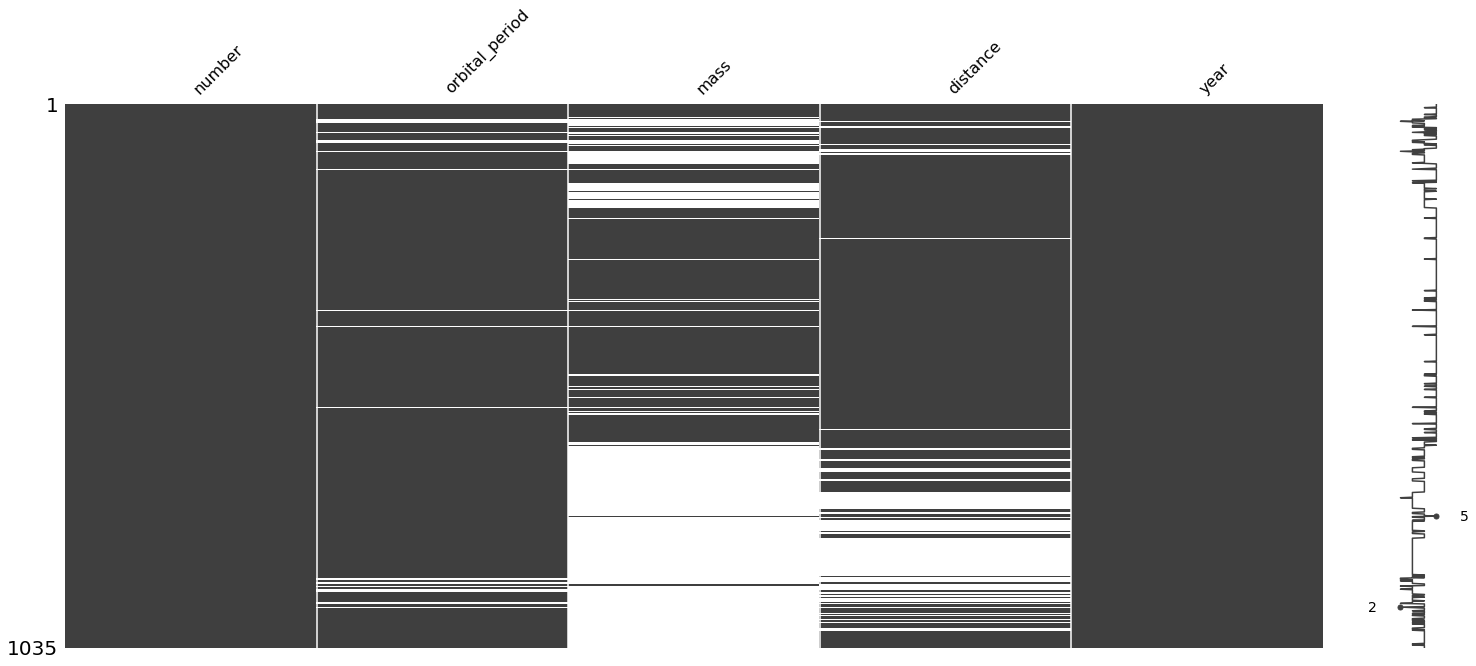

In [162]:
import seaborn as sns
df = sns.load_dataset('planets').copy()
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.isnull().sum())
msno.matrix(df);

In [163]:
#!pip install fancyimpute 

In [164]:
from fancyimpute import KNN

ModuleNotFoundError: No module named 'fancyimpute'

In [165]:
import pandas as pd

In [166]:
var_names = list(df)

## KNN

In [167]:
knn_imp = KNN(k = 5).fit_transform(df);

NameError: name 'KNN' is not defined

In [168]:
knn_imp[0:1]

NameError: name 'knn_imp' is not defined

In [ ]:
dff = pd.DataFrame(knn_imp)

In [ ]:
dff.head()

In [ ]:
dff.columns = var_names

In [ ]:
dff.head()

In [ ]:
dff.isnull().sum()

In [ ]:
#!pip install ycimpute

In [ ]:
from ycimpute.imputer import knnimput

In [ ]:
var_names = list(df)

In [ ]:
n_df = np.array(df)

In [ ]:
n_df.shape

In [ ]:
dff = knnimput.KNN(k=4).complete(n_df)

In [ ]:
dff = pd.DataFrame(dff, columns = var_names)

In [ ]:
dff.head()

In [ ]:
dff.isnull().sum()

## Random Forests ile Atama

number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


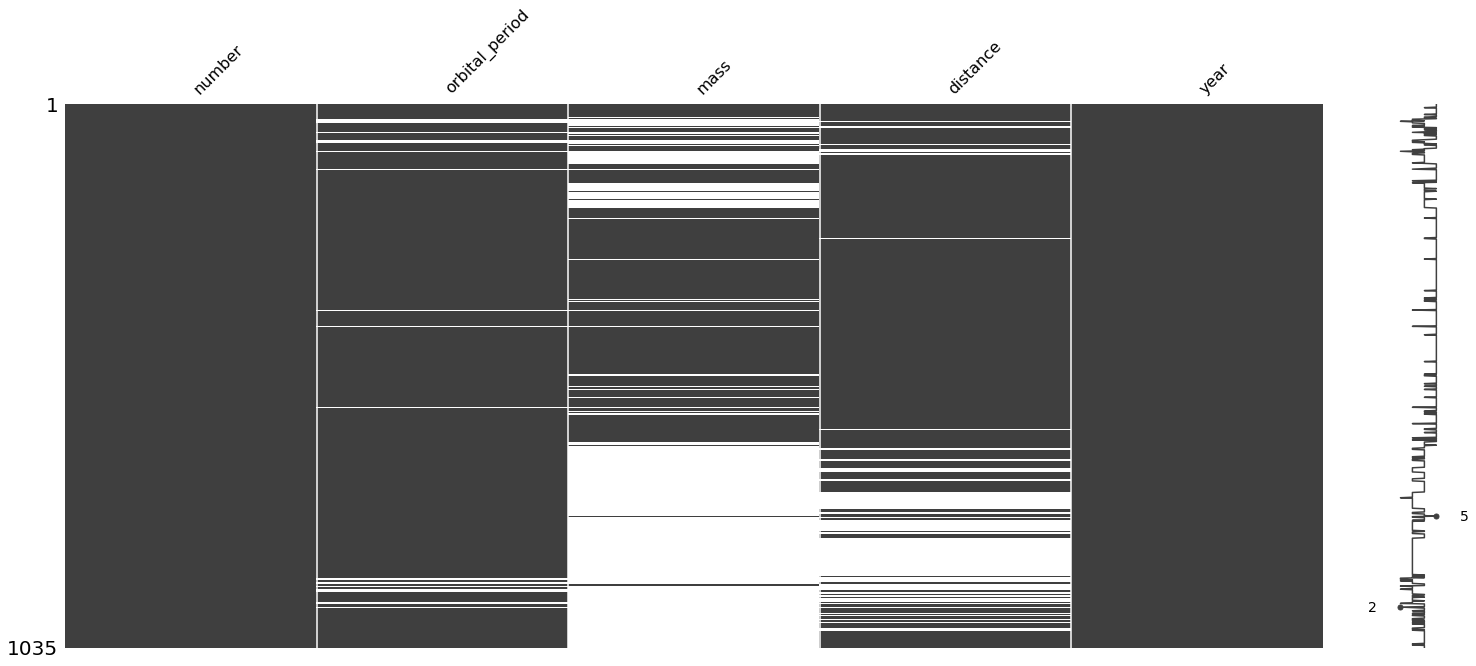

In [3]:
import seaborn as sns
df = sns.load_dataset('planets').copy()
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.isnull().sum())
msno.matrix(df);

In [4]:
from ycimpute.imputer import iterforest

ModuleNotFoundError: No module named 'ycimpute'

In [ ]:
var_names = list(df)

In [ ]:
n_df = np.array(df)

In [ ]:
dff = iterforest.IterImput().complete(n_df)

In [ ]:
dff = pd.DataFrame(dff, columns = var_names)

In [ ]:
dff.isnull().sum()

## EM ile Atama

In [5]:
df.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [6]:
from ycimpute.imputer import EM

ModuleNotFoundError: No module named 'ycimpute'

In [ ]:
var_names = list(df)

In [ ]:
n_df = np.array(df)

In [ ]:
dff = EM().complete(n_df)

In [ ]:
dff = pd.DataFrame(dff, columns = var_names)

In [ ]:
dff.isnull().sum()
# en iyi algoritmayı daha profesyonelce seçmek için gözlemleri bilinen satırlara
#suni veya eksik gözlemler ekleyip tahmin ettirerek en iyi algoritmaya karar verilebilir.

## -----------------------------------------------------------------------------------

#  Veri Standardizasyonu & Değişken Dönüşümü

## Standartlaştırma

In [7]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)



df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [8]:
from sklearn import preprocessing

In [9]:
preprocessing.scale(df)
#copy=True argümanı ön tanımlı çalışır.
#ortalaması sıfır, standart sapması bir olacak şekilde standartlaştırıldı.

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

## Normalizasyon

In [10]:
preprocessing.normalize(df)
#sıfır bir arasında olacak şekilde dönüştürülüyor.(eşik değerler kullanarak)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

## Min-Max Dönüşümü

In [12]:
scaler = preprocessing.MinMaxScaler(feature_range = (10,20))
#bir değişkenin değerini istediğimiz iki aralık arasına dönüştürür.

In [13]:
scaler.fit_transform(df)
#10 ile 20 arasında dönüştürme işlemi yaptı.
#varyans yapısı korundu ama ölçekleri değişti

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

## Binarize Dönüşüm

In [14]:
binarizer = preprocessing.Binarizer(threshold = 5).fit(df)
#belirli bir eşik değere göre değişkenin değerlerini 0/1'e dönüştürür.
#bu değişim standartlaştırma değil dönüştürülme işlemidir.Taşınan bilgiyi etkiler.
#ölçeği bozulur.

In [15]:
binarizer.transform(df)

array([[0., 1., 1.],
       [0., 1., 1.],
       [1., 0., 0.],
       [0., 1., 1.],
       [1., 1., 1.]])

## 0-1 Dönüşümü

In [16]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df_l = df.copy()
#kategorik değişken sürekli değişkene çevriliyor.nümerik hesaplamalar uygulanabilmesi için...

In [17]:
df_l.head()
#amacımız 'sex' kategorik değişkenini binary hale getirmek.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
df_l["yeni_sex"] = df_l["sex"].cat.codes

In [26]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


In [29]:
scaler_lbe = preprocessing.LabelEncoder()
#bu işlemi bu bu fonksiyon ile de yapabiliriz.

In [30]:
df_l["daha_yeni_sex"] = scaler_lbe.fit_transform(df_l["sex"])

In [31]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


## "1 ve Diğerleri (0) " Dönüşümü

In [32]:
df.head()
#ikiden fazla sınıfa sahip kategorik değişkenin değerlerini 1 ve diğerleri şeklinde
#dönüştürmek için kullanılır.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [33]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


In [34]:
df_l["yen_gun"] = np.where(df_l["day"].str.contains("Sun"),1,0)

In [35]:
df_l.head(20)

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex,yen_gun
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1
5,25.29,4.71,Male,No,Sun,Dinner,4,0,1,1
6,8.77,2.00,Male,No,Sun,Dinner,2,0,1,1
7,26.88,3.12,Male,No,Sun,Dinner,4,0,1,1
8,15.04,1.96,Male,No,Sun,Dinner,2,0,1,1
9,14.78,3.23,Male,No,Sun,Dinner,2,0,1,1


## Çok Sınıflı Dönüşüm

In [36]:
lbe = preprocessing.LabelEncoder() #lbe=scale
#dönüştürme işlemini varolan sınıf sayısı kadar dönüştürmesi
#bu dönüşümde algoritmaların kafası karışmaktadır.
#kategorik değişkenlerin sınıflarının bağımlı değişkenlere olan etkileri bozulmaktadır.
#bu sebeple one-hot dönüşümü yapmak gerekir.
#çünkü gözlemler arasında sınıf farkı yokken(nominal) var hale gelir(ordinal).

In [37]:
df_l["daha_yeni_gun"] = lbe.fit_transform(df_l["day"])

In [38]:
df_l

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex,yen_gun,daha_yeni_gun
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,1,0,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,0,0,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,1,0,1
242,17.82,1.75,Male,No,Sat,Dinner,2,0,1,0,1


## One-Hot Dönüşümü ve Dummy Değişken Tuzayı

In [39]:
df_one_hot = df.copy()
#dummy değişken tuzağı:birden fazla değişken aynı bilgiyi taşımasına, aynı şeyi ifade etmesine denir.

In [40]:
pd.get_dummies(df_one_hot, columns = ["sex"], prefix = ["sex"]).head()

,total_bill,tip,smoker,day,time,size,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1


In [41]:
pd.get_dummies(df_one_hot, columns = ["day"], prefix = ["day"]).head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,0,0,1


## Sürekli Değişkeni Kategorik Değişkene Çevirme

In [169]:
df.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [170]:
dff = df.select_dtypes(include = ["float64", "int64"])

In [181]:
from sklearn import preprocessing
est = preprocessing.KBinsDiscretizer(n_bins = [3,2,2], encode = "ordinal", strategy = "quantile").fit(dff)

AttributeError: module 'sklearn.preprocessing' has no attribute 'KBinsDiscretizer'

In [172]:
est.transform(dff)[0:10]

NameError: name 'est' is not defined

## Değişkeni İndexe, İndexi Değişkene Çevirmek

In [173]:
df.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [174]:
df["yeni_degisken"]  = df.index

In [175]:
df["yeni_degisken"] = df["yeni_degisken"] + 10

In [176]:
df.head()

,number,orbital_period,mass,distance,year,yeni_degisken
0,1,269.300,7.10,77.40,2006,10
1,1,874.774,2.21,56.95,2008,11
2,1,763.000,2.60,19.84,2011,12
3,1,326.030,19.40,110.62,2007,13
4,1,516.220,10.50,119.47,2009,14


In [177]:
df.index = df["yeni_degisken"]

In [178]:
df.index

Int64Index([  10,   11,   12,   13,   14,   15,   16,   17,   18,   19,
            ...
            1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044],
           dtype='int64', name='yeni_degisken', length=1035)